In [427]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
%matplotlib inline

In [428]:
#datasets
df_socmed = pd.read_csv('hookit_data_sept17.csv', index_col=0, header=0, parse_dates=True)
df_playerdata = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)
df_clubrev = pd.read_csv('Club Revenue Deloitte.csv', parse_dates=True)

In [429]:
#can lookup players in files
print(df_playerdata.loc[df_playerdata['Name'] == 'Jorge Torres'])
print(df_socmed.loc[df_socmed['name'] == 'Lukas Podolski'])

Empty DataFrame
Columns: [Name, Date.of.birth, Place.of.birth, Age, Height, Shoe.size, Nationality, Position, Foot, Current.club, Current.market.value, Highest.market.value, City.of.birth, Country.of.birth, Birth.country.code, Continent, Continent.specific]
Index: []
              name   facebook    twitter  instagram  total_followers  \
47  Lukas Podolski  7753175.0  3507746.0  3258776.0         14519697   

    new_followers_month  posts  interactions_likes_comments_retweets  
47              24400.0  132.0                             4000000.0  


In [430]:
#list of players according to social media following 
df_socmedtop100 = df_socmed.head(n=100)
df_socmedtop100 = df_socmedtop100.sort_values(by=['name'])
print(df_socmedtop100)


                         name     facebook     twitter    instagram  \
89             Alexis Sanchez    4941472.0   2351324.0    7096550.0   
20              Alvaro Morata    7550830.0   3968453.0    7404470.0   
15             Andres Iniesta   27039865.0  18777628.0   19676633.0   
69            Anthony Martial    1009227.0   1050450.0    4338984.0   
13          Antoine Griezmann    7057771.0   4426445.0   13154977.0   
83           Antonio Valencia       6740.0    623282.0    1475854.0   
34               Arturo Vidal    2040409.0   3507228.0    4343627.0   
25            Bafetimbi Gomis     426593.0    731738.0     631544.0   
40             Benjamin Mendy          NaN    478109.0     723194.0   
52             Blaise Matuidi    2077574.0   2013493.0    2492418.0   
28                   Casemiro    4167343.0   1206868.0    6088494.0   
79          Claudio Marchisio    2598987.0   1720185.0    3217649.0   
0           Cristiano Ronaldo  122586009.0  60370888.0  112346228.0   
22    

In [431]:
#list of top 10000 players in market value
df_playervalue = df_playerdata.sort_values(['Current.market.value'], ascending=[False])
df_playervalue = df_playervalue[['Name','Current.market.value']]
df_mktvaltop10000 = df_playervalue.head(n=10000)
df_mktvaltop10000 = df_mktvaltop10000.sort_values(by=['Name'])
print(df_mktvaltop10000)

                         Name  Current.market.value
8253           A.J. DeLaGarza              750000.0
12804      Aaron Appindangoye              700000.0
1454            Aaron Caricol            10000000.0
250           Aaron Cresswell            12000000.0
3610               Aaron Hunt             1500000.0
183              Aaron Lennon             5000000.0
14372        Aaron Leya Iseka             1250000.0
8033               Aaron Long              500000.0
7923              Aaron Maund              500000.0
13287           Aaron Meijers              750000.0
524                Aaron Mooy             7000000.0
1972             Aaron Niguez              500000.0
11099           Aaron Olanare             1000000.0
410            Aaron Ramsdale              500000.0
93               Aaron Ramsey            35000000.0
4250             Aaron Seydel              500000.0
12063       Aatif Chahechouhe             2000000.0
2688           Abdallah Ndour              600000.0
12998       

In [432]:
#this gives you the merger of top in soc media and top in market value
#missing players on soc med list maybe not active or not in top 100 wrt followers
df_alltop = pd.merge(left=df_socmedtop100[['name']],
                     right=df_playervalue[['Name']], 
                     left_on='name',
                     right_on='Name',
                     how='inner')
print (df_alltop)


                         name                       Name
0              Alexis Sanchez             Alexis Sanchez
1               Alvaro Morata              Alvaro Morata
2              Andres Iniesta             Andres Iniesta
3             Anthony Martial            Anthony Martial
4           Antoine Griezmann          Antoine Griezmann
5            Antonio Valencia           Antonio Valencia
6                Arturo Vidal               Arturo Vidal
7             Bafetimbi Gomis            Bafetimbi Gomis
8              Benjamin Mendy             Benjamin Mendy
9              Blaise Matuidi             Blaise Matuidi
10                   Casemiro                   Casemiro
11          Claudio Marchisio          Claudio Marchisio
12          Cristiano Ronaldo          Cristiano Ronaldo
13                 Dani Alves                 Dani Alves
14                 David Luiz                 David Luiz
15                David Villa                David Villa
16               David de Gea  

In [363]:
df_alltop.iloc[28:]

,name,Name
28,Gyasi Zardes,Gyasi Zardes
29,Harry Kane,Harry Kane
30,Henrikh Mkhitaryan,Henrikh Mkhitaryan
31,Iker Casillas,Iker Casillas
32,Isco,Isco
33,Ivan Rakitic,Ivan Rakitic
34,James Rodriguez,James Rodriguez
35,Jerome Boateng,Jerome Boateng
36,Jesse Lingard,Jesse Lingard
37,John Terry,John Terry


In [433]:
df_playerdata_merge = pd.merge(left=df_playerdata,right=df_socmed, left_on='Name', right_on='name')

In [434]:
df_playerdata_merge.columns

Index(['Name', 'Date.of.birth', 'Place.of.birth', 'Age', 'Height', 'Shoe.size',
       'Nationality', 'Position', 'Foot', 'Current.club',
       'Current.market.value', 'Highest.market.value', 'City.of.birth',
       'Country.of.birth', 'Birth.country.code', 'Continent',
       'Continent.specific', 'name', 'facebook', 'twitter', 'instagram',
       'total_followers', 'new_followers_month', 'posts',
       'interactions_likes_comments_retweets'],
      dtype='object')

In [435]:
df_playerdata_merge['aipp'] = df_playerdata_merge.interactions_likes_comments_retweets / df_playerdata_merge.posts 

In [436]:
df_playerdata_merge = df_playerdata_merge[['Name','Age','Place.of.birth', 'Continent', 'Position', 'Foot', 'Current.market.value', 'Highest.market.value', 'Current.club','facebook', 'twitter', 'instagram', 'total_followers', 'posts','aipp']]

In [368]:
df_playerdata_merge.describe()

,Current.market.value,Highest.market.value,facebook,twitter,instagram,total_followers,posts,aipp
count,8.600000e+01,8.600000e+01,7.900000e+01,8.000000e+01,8.300000e+01,8.600000e+01,85.000000,8.500000e+01
mean,3.421802e+07,4.401453e+07,1.066789e+07,4.938853e+06,1.019717e+07,2.423531e+07,50.611765,2.135817e+05
std,2.637645e+07,2.391112e+07,1.892120e+07,8.654221e+06,1.757477e+07,4.232695e+07,28.513612,3.520223e+05
min,5.000000e+05,2.500000e+06,6.740000e+03,8.900000e+01,1.170500e+04,0.000000e+00,9.000000,2.619048e+04
25%,1.200000e+07,3.000000e+07,1.198098e+06,8.155922e+05,2.628418e+06,4.435744e+06,31.000000,5.283019e+04
50%,3.000000e+07,3.900000e+07,4.710406e+06,1.980093e+06,4.847069e+06,1.169173e+07,49.000000,8.536585e+04
75%,4.500000e+07,5.500000e+07,9.572203e+06,4.483133e+06,1.062010e+07,2.249453e+07,63.000000,2.054545e+05
max,1.200000e+08,1.200000e+08,1.225860e+08,6.037089e+07,1.123462e+08,2.953031e+08,168.000000,2.162037e+06


In [437]:
df_playerdata_merge.dtypes

Name                     object
Age                      object
Place.of.birth           object
Continent                object
Position                 object
Foot                     object
Current.market.value    float64
Highest.market.value    float64
Current.club             object
facebook                float64
twitter                 float64
instagram               float64
total_followers           int64
posts                   float64
aipp                    float64
dtype: object

Text(0.5,0,'All Active Players')

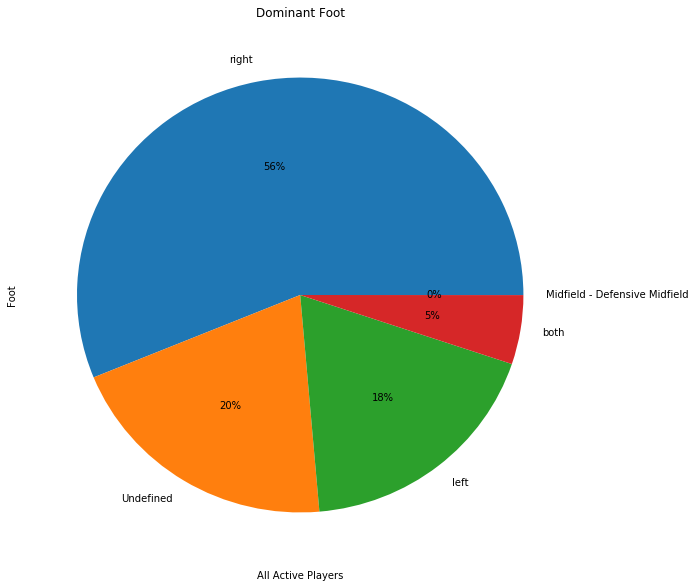

In [439]:
#fix this, dom foot for all active players
df_playerdata.Foot.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))
plt.title('Dominant Foot')
plt.xlabel('All Active Players')

Text(0.5,0,'Top in Soc Media')

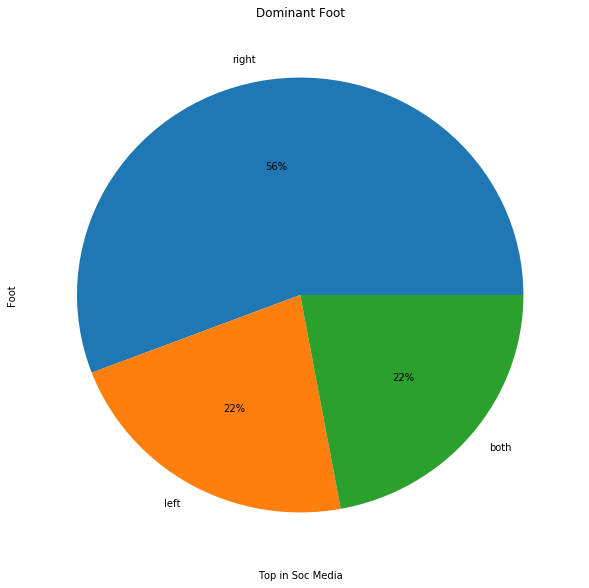

In [440]:
df_playerdata_merge.Foot.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10,10))
plt.title('Dominant Foot')
plt.xlabel('Top in Soc Media')

In [370]:
df_playerdata_merge[['Age']] = df_playerdata_merge[['Age']].apply(pd.to_numeric)

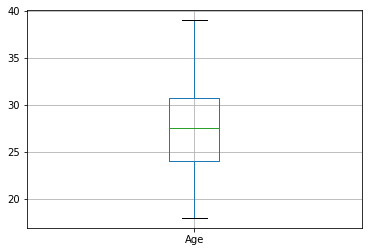

In [371]:
df_playerdata_merge.boxplot(column='Age')

(array([  4.,   4.,  15.,  16.,  10.,  15.,   9.,   5.,   6.,   2.]),
 array([ 18. ,  20.1,  22.2,  24.3,  26.4,  28.5,  30.6,  32.7,  34.8,
         36.9,  39. ]),
 <a list of 10 Patch objects>)

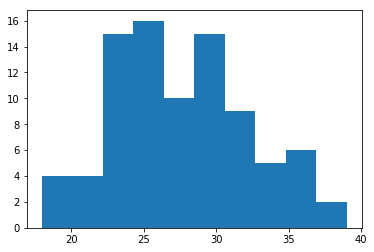

In [372]:
plt.hist(df_playerdata_merge.Age)

(array(1.0), array(25.0))

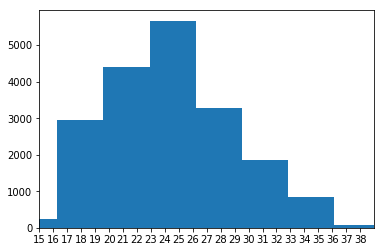

In [373]:
#label but the one below is for the entire data set of active players, the one aboc is social media top 100.
#combine these two into one overlapping the other...subplot . blue red
plt.hist(df_playerdata.Age)
x = np.arange(16, 40, 1)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.title('Age Distribution of Active Players',fontsize=20)
#plt.xlabel('Age',fontsize=15)
#plt.ylabel('Number of Players',fontsize=15)
plt.xticks(x)
plt.xlim(16,40)



In [374]:
#sort values by market value 
df_sortmarket = df_playerdata_merge.sort_values(['Current.market.value'], ascending=[False])
df_sortmarket = df_sortmarket[['Name','Current.market.value']]
df_sortmarket.head(n=20)


,Name,Current.market.value
47,Lionel Messi,120000000.0
34,Cristiano Ronaldo,100000000.0
53,Neymar,100000000.0
48,Luis Suarez,90000000.0
65,Robert Lewandowski,80000000.0
36,Gareth Bale,80000000.0
49,Antoine Griezmann,80000000.0
12,Paul Pogba,75000000.0
6,Eden Hazard,75000000.0
30,Toni Kroos,70000000.0


In [375]:
df_sortfollowers = df_playerdata_merge.sort_values(['total_followers'], ascending=[False])
df_sortfollowers.head()
df_sortfollowers = df_sortfollowers[['Name','total_followers']]
df_sortfollowers.head(n=20)

,Name,total_followers
34,Cristiano Ronaldo,295303125
53,Neymar,176217584
47,Lionel Messi,170259880
63,James Rodriguez,79961391
36,Gareth Bale,75149723
77,Kaka,71665840
43,Andres Iniesta,65494126
20,Mesut Ozil,64192643
18,Zlatan Ibrahimovic,59417527
26,Sergio Ramos,55524151


In [376]:
#sort values by followers
# put first ten rows of these two side by side

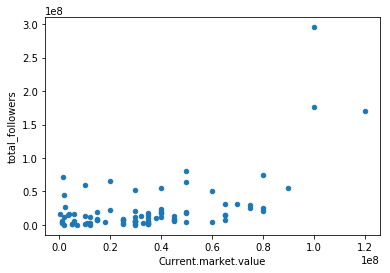

In [377]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='total_followers')

In [251]:
#fit
#a, b = np.polyfit(np.array(df_playerdata_merge['Current.market.value']), np.array(df_playerdata_merge['total_followers']), deg=1)
#f = lambda x: a*x - b
#print(a)
#print(b)

In [252]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(df_playerdata_merge['Current.market.value'],df_playerdata_merge['total_followers'])

#fit function
#f = lambda x: a*x - b
# x values of line to plot
#x = np.array([0,100])
# plot fit
#plt.plot(x,f(x),lw=2.5, c="k",label="fit line between 0 and 100")

#better take min and max of x values
#x = np.array([min(bill),max(bill)])
#plt.plot(x,f(x), c="orange", label="fit line between min and max")

#plt.legend()
#plt.show()

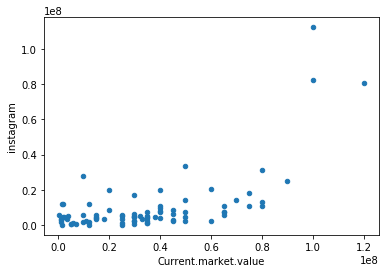

In [378]:
#would be good to mention that this is a fixed point in time might want to look at trend of market value with followers in future
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='instagram')

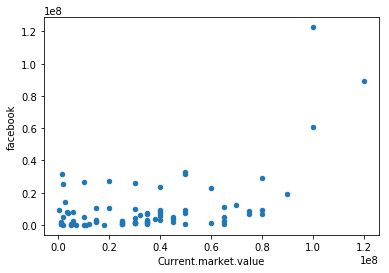

In [379]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='facebook')

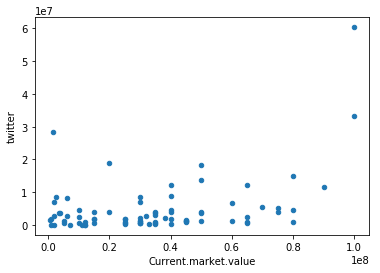

In [380]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='twitter')

In [381]:
df_socmedbar = df_playerdata_merge.sort_values(by=['total_followers'], ascending=False)
df_socmedbar.head(n=50)


,Name,Age,Place.of.birth,Continent,Position,Current.market.value,Highest.market.value,Current.club,facebook,twitter,instagram,total_followers,posts,aipp
34,Cristiano Ronaldo,32,"Funchal, Portugal",Europe,Striker - Left Wing,100000000.0,120000000.0,Real Madrid,122586009.0,60370888.0,112346228.0,295303125,108.0,2.162037e+06
53,Neymar,25,"Mogi das Cruzes, Brazil",South America,Striker - Left Wing,100000000.0,100000000.0,Paris Saint-Germain,60818929.0,33250934.0,82147721.0,176217584,75.0,1.569333e+06
47,Lionel Messi,30,"Rosario, Argentina",South America,Striker - Right Wing,120000000.0,120000000.0,FC Barcelona,89347597.0,NaN,80912283.0,170259880,50.0,1.608000e+06
63,James Rodriguez,26,"Cucuta, Colombia",South America,Midfield - Attacking Midfield,50000000.0,80000000.0,Bayern Munich,33106153.0,13640634.0,33214604.0,79961391,42.0,3.142857e+05
36,Gareth Bale,28,"Cardiff, Wales",Europe,Striker - Right Wing,80000000.0,90000000.0,Real Madrid,28990033.0,14793056.0,31366634.0,75149723,49.0,3.020408e+05
77,Kaka,35,"Brasilia, Brazil",South America,Midfield - Attacking Midfield,1500000.0,70000000.0,Orlando City SC,31608415.0,28279106.0,11778319.0,71665840,38.0,1.368421e+05
43,Andres Iniesta,33,"Fuentealbilla, Spain",Europe,Midfield - Central Midfield,20000000.0,70000000.0,FC Barcelona,27039865.0,18777628.0,19676633.0,65494126,77.0,1.675325e+05
20,Mesut Ozil,28,"Gelsenkirchen, Germany",Europe,Midfield - Attacking Midfield,50000000.0,50000000.0,Arsenal FC,31695071.0,18326136.0,14171436.0,64192643,51.0,3.901961e+05
18,Zlatan Ibrahimovic,35,"Malmo, Sweden",Europe,Striker - Centre-Forward,10000000.0,46000000.0,Manchester United,26757465.0,4653196.0,28006866.0,59417527,22.0,9.318182e+05
26,Sergio Ramos,31,"Camas (Sevilla), Spain",Europe,Defence - Centre-Back,40000000.0,45000000.0,Real Madrid,23514573.0,12292847.0,19716731.0,55524151,104.0,3.980769e+05


In [382]:
df_socmedbar = df_socmedbar[['facebook', 'twitter', 'instagram']]
df_socmedbar.head()

,facebook,twitter,instagram
34,122586009.0,60370888.0,112346228.0
53,60818929.0,33250934.0,82147721.0
47,89347597.0,NaN,80912283.0
63,33106153.0,13640634.0,33214604.0
36,28990033.0,14793056.0,31366634.0


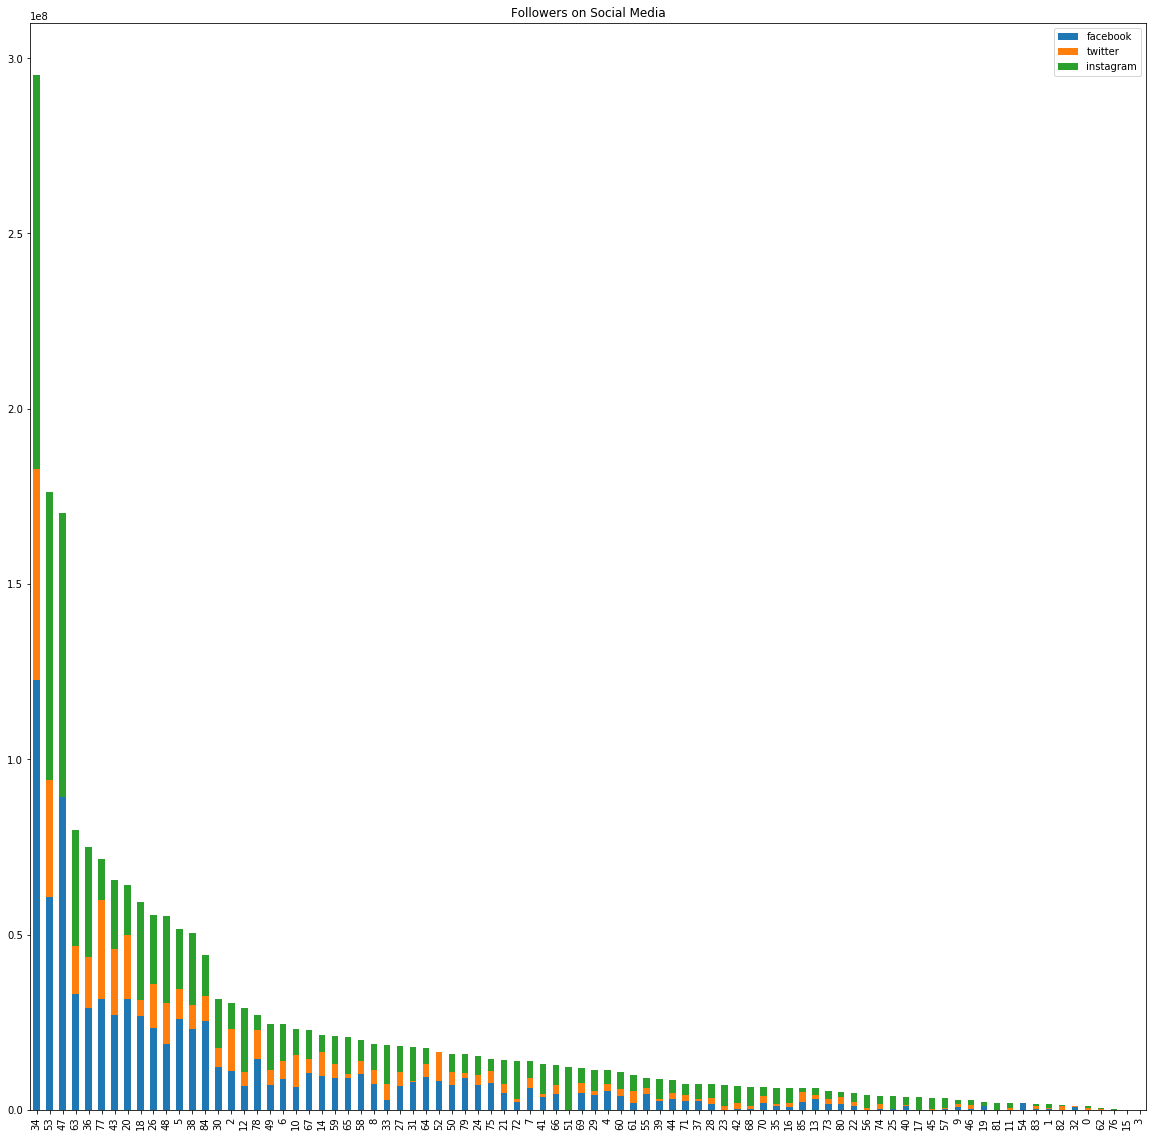

In [383]:
#label this bar graph title and labels for x and y 
ax = df_socmedbar.plot(kind='bar', title = 'Followers on Social Media', stacked=True, figsize=(20, 20))


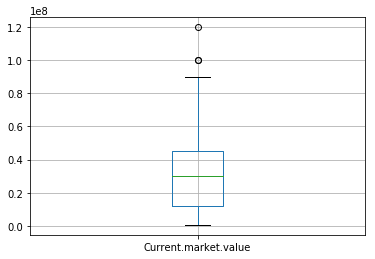

In [384]:
df_playerdata_merge.boxplot(column='Current.market.value')

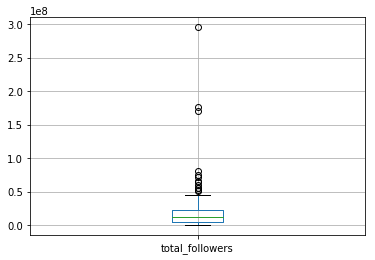

In [385]:
df_playerdata_merge.boxplot(column='total_followers')

In [388]:
totfo = df_playerdata_merge.iloc[:, -3]
totfo = totfo.dropna()
cmv = df_playerdata_merge.iloc[:,-9]
cmv = cmv.dropna()

sp.stats.ttest_ind(totfo, cmv, equal_var=False)

Ttest_indResult(statistic=-1.8562423959973864, pvalue=0.065486139274665914)

In [389]:
age = df_playerdata_merge.iloc[:, -13]
sp.stats.ttest_ind(totfo, age, equal_var=False)

Ttest_indResult(statistic=5.3098266372793326, pvalue=8.6417644964112139e-07)

In [390]:
df_playerdata_addrev = pd.merge(left=df_playerdata_merge,right=df_clubrev, left_on='Current.club', right_on='Club')

In [391]:
df_playerdata_addrev = df_playerdata_addrev.sort_values(by=['Club Revenue'], ascending=[False])

In [392]:
df_playerdata_addrev.head()

,Name,Age,Place.of.birth,Continent,Position,Current.market.value,Highest.market.value,Current.club,facebook,twitter,instagram,total_followers,posts,aipp,Club,Club Revenue
16,Anthony Martial,21,"Massy, France",Europe,Striker - Centre-Forward,30000000.0,32000000.0,Manchester United,1009227.0,1050450.0,4338984.0,6398661,25.0,104000.000000,Manchester United,689000000.0
18,Zlatan Ibrahimovic,35,"Malmo, Sweden",Europe,Striker - Centre-Forward,10000000.0,46000000.0,Manchester United,26757465.0,4653196.0,28006866.0,59417527,22.0,931818.181818,Manchester United,689000000.0
17,Marcus Rashford,19,"Manchester, England",Europe,Striker - Centre-Forward,18000000.0,18000000.0,Manchester United,103265.0,NaN,3521184.0,3624449,18.0,122222.222222,Manchester United,689000000.0
10,David de Gea,26,"Madrid, Spain",Europe,Goalkeeper,40000000.0,40000000.0,Manchester United,6639054.0,8951138.0,7554932.0,23145124,41.0,100000.000000,Manchester United,689000000.0
11,Antonio Valencia,32,"Nueva Loja, Ecuador",South America,Defence - Right-Back,10000000.0,27500000.0,Manchester United,6740.0,623282.0,1475854.0,2105876,37.0,59459.459459,Manchester United,689000000.0


In [393]:
df_playerdata_addrev2 = df_playerdata_addrev.drop(df_playerdata_addrev.tail(n=6).index)

In [394]:
df_playerdata_addrev2.iloc[28:]

,Name,Age,Place.of.birth,Continent,Position,Current.market.value,Highest.market.value,Current.club,facebook,twitter,instagram,total_followers,posts,aipp,Club,Club Revenue
28,Casemiro,25,"Sao Jose dos Campos, Brazil",South America,Midfield - Defensive Midfield,30000000.0,30000000.0,Real Madrid,4167343.0,1206868.0,6088494.0,11462705,60.0,1.066667e+05,Real Madrid,620100000.0
27,Nacho Fernandez,27,"Madrid, Spain",Europe,Defence - Centre-Back,15000000.0,15000000.0,Real Madrid,1835886.0,1742294.0,3759980.0,7338160,30.0,6.333333e+04,Real Madrid,620100000.0
26,Raphael Varane,24,"Lille, France",Europe,Defence - Centre-Back,35000000.0,35000000.0,Real Madrid,6789224.0,3921878.0,7490904.0,18202006,52.0,5.961538e+04,Real Madrid,620100000.0
25,Sergio Ramos,31,"Camas (Sevilla), Spain",Europe,Defence - Centre-Back,40000000.0,45000000.0,Real Madrid,23514573.0,12292847.0,19716731.0,55524151,104.0,3.980769e+05,Real Madrid,620100000.0
60,Arturo Vidal,30,"Santiago de Chile, Chile",South America,Midfield - Central Midfield,35000000.0,45000000.0,Bayern Munich,2040409.0,3507228.0,4343627.0,9891264,59.0,8.474576e+04,Bayern Munich,592000000.0
58,Manuel Neuer,31,"Gelsenkirchen-Buer, Germany",Europe,Goalkeeper,40000000.0,45000000.0,Bayern Munich,9228748.0,4011220.0,7994746.0,21234714,15.0,1.866667e+05,Bayern Munich,592000000.0
64,Robert Lewandowski,29,"Warszawa, Poland",Europe,Striker - Centre-Forward,80000000.0,80000000.0,Bayern Munich,9261083.0,931134.0,10711985.0,20904202,35.0,2.285714e+05,Bayern Munich,592000000.0
63,Thomas Muller,27,"Weilheim, Germany",Europe,Striker - Secondary Striker,50000000.0,75000000.0,Bayern Munich,9474324.0,3698737.0,4634388.0,17807449,47.0,4.893617e+04,Bayern Munich,592000000.0
62,James Rodriguez,26,"Cucuta, Colombia",South America,Midfield - Attacking Midfield,50000000.0,80000000.0,Bayern Munich,33106153.0,13640634.0,33214604.0,79961391,42.0,3.142857e+05,Bayern Munich,592000000.0
61,Franck Ribery,34,"Boulogne-sur-Mer, France",Europe,Midfield - Left Midfield,7000000.0,50000000.0,Bayern Munich,110202.0,61496.0,392381.0,564079,67.0,6.417910e+04,Bayern Munich,592000000.0


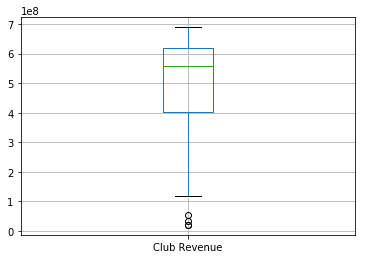

In [395]:
df_playerdata_addrev2.boxplot(column='Club Revenue')

In [396]:
df_playerdata_addrev2.rename(columns={'Current.club': 'Current_club'}, inplace=True)

Text(0.5,0,'How many players from each club')

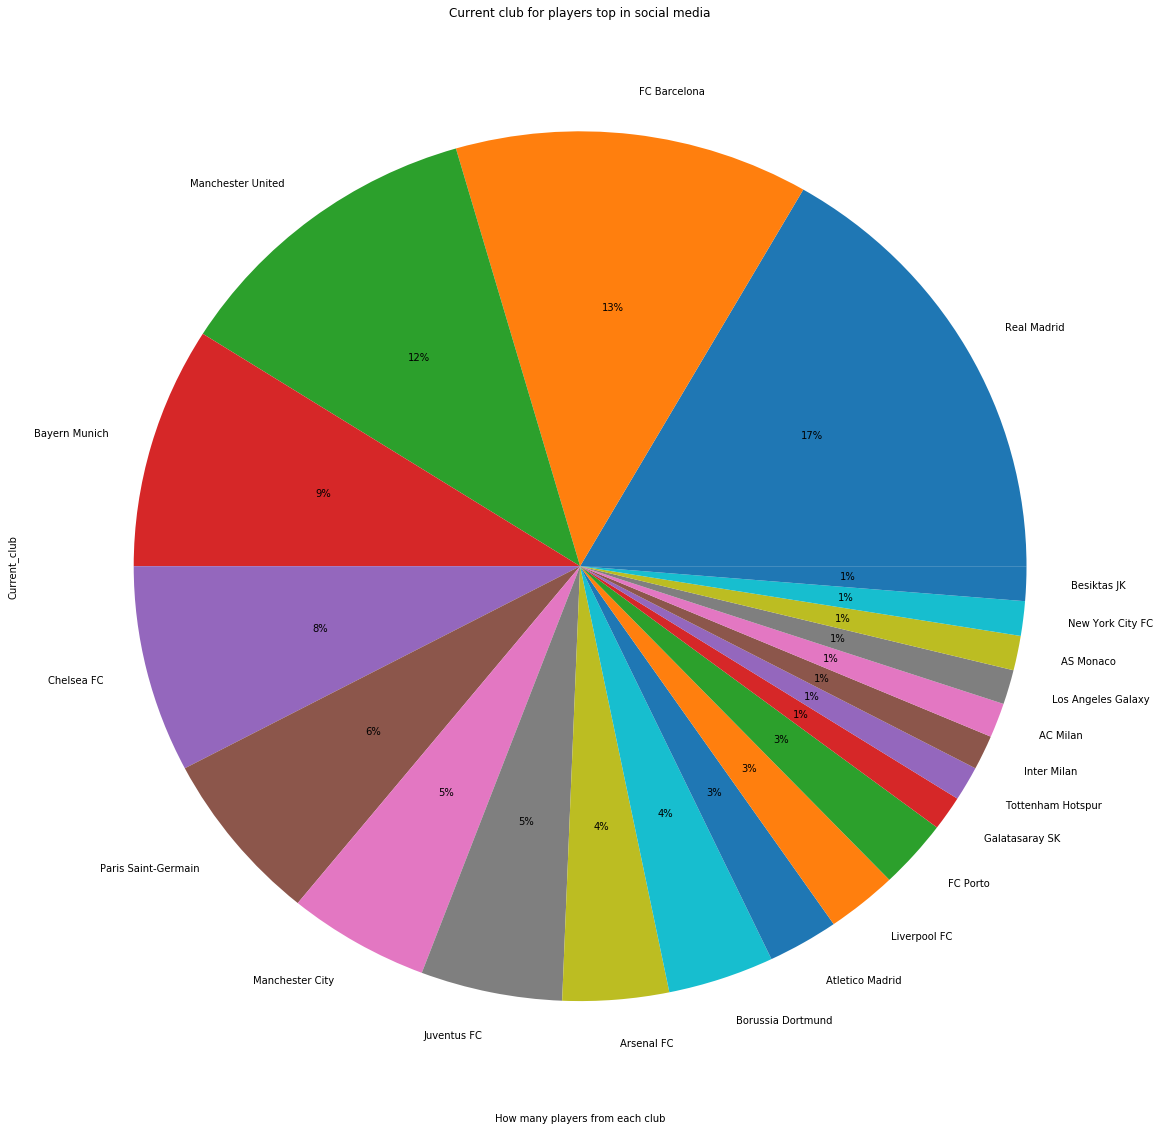

In [397]:
df_playerdata_addrev2.Current_club.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))
plt.title('Current club for players top in social media')
plt.xlabel('How many players from each club')
#clean this up with legend to the side and space between slices

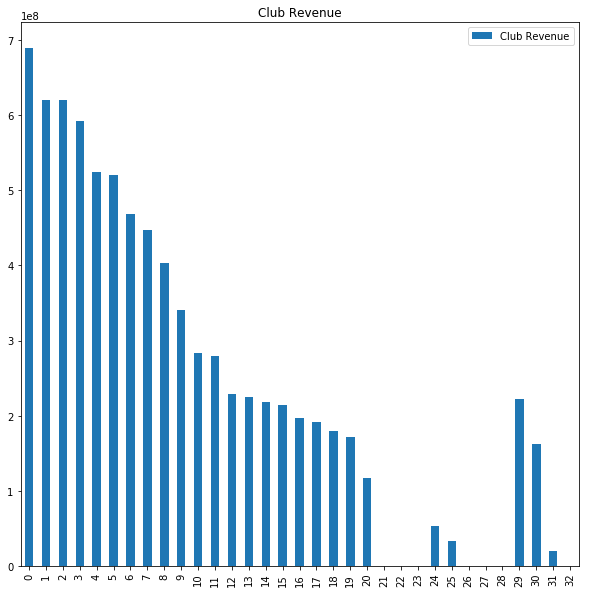

In [348]:
#add labels
#remove nan
df_clubrev.plot(kind='bar', title = 'Club Revenue', stacked=True, figsize=(10, 10))

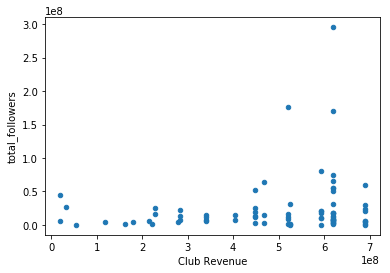

In [349]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='total_followers')

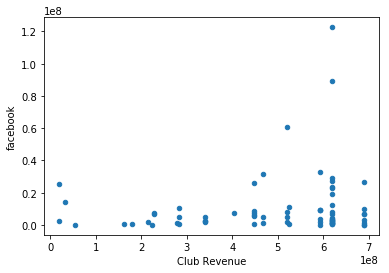

In [398]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='facebook')

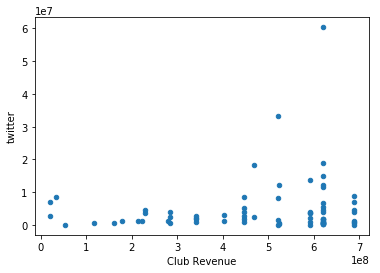

In [399]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='twitter')

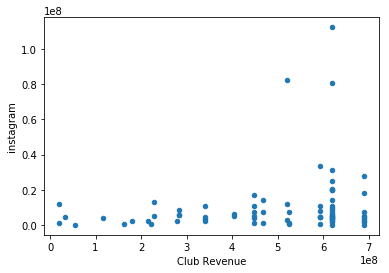

In [400]:
df_playerdata_addrev2.plot(kind='scatter', x='Club Revenue', y='instagram')

In [401]:
crev = df_playerdata_addrev2.iloc[:, -1]
totfo = df_playerdata_addrev2.iloc[:, -5]
totfo = totfo.dropna()

In [402]:
#nothing there or two small a dataset
sp.stats.ttest_ind(totfo, crev, equal_var=False)

Ttest_indResult(statistic=-21.789839585748208, pvalue=9.9492887809053235e-37)

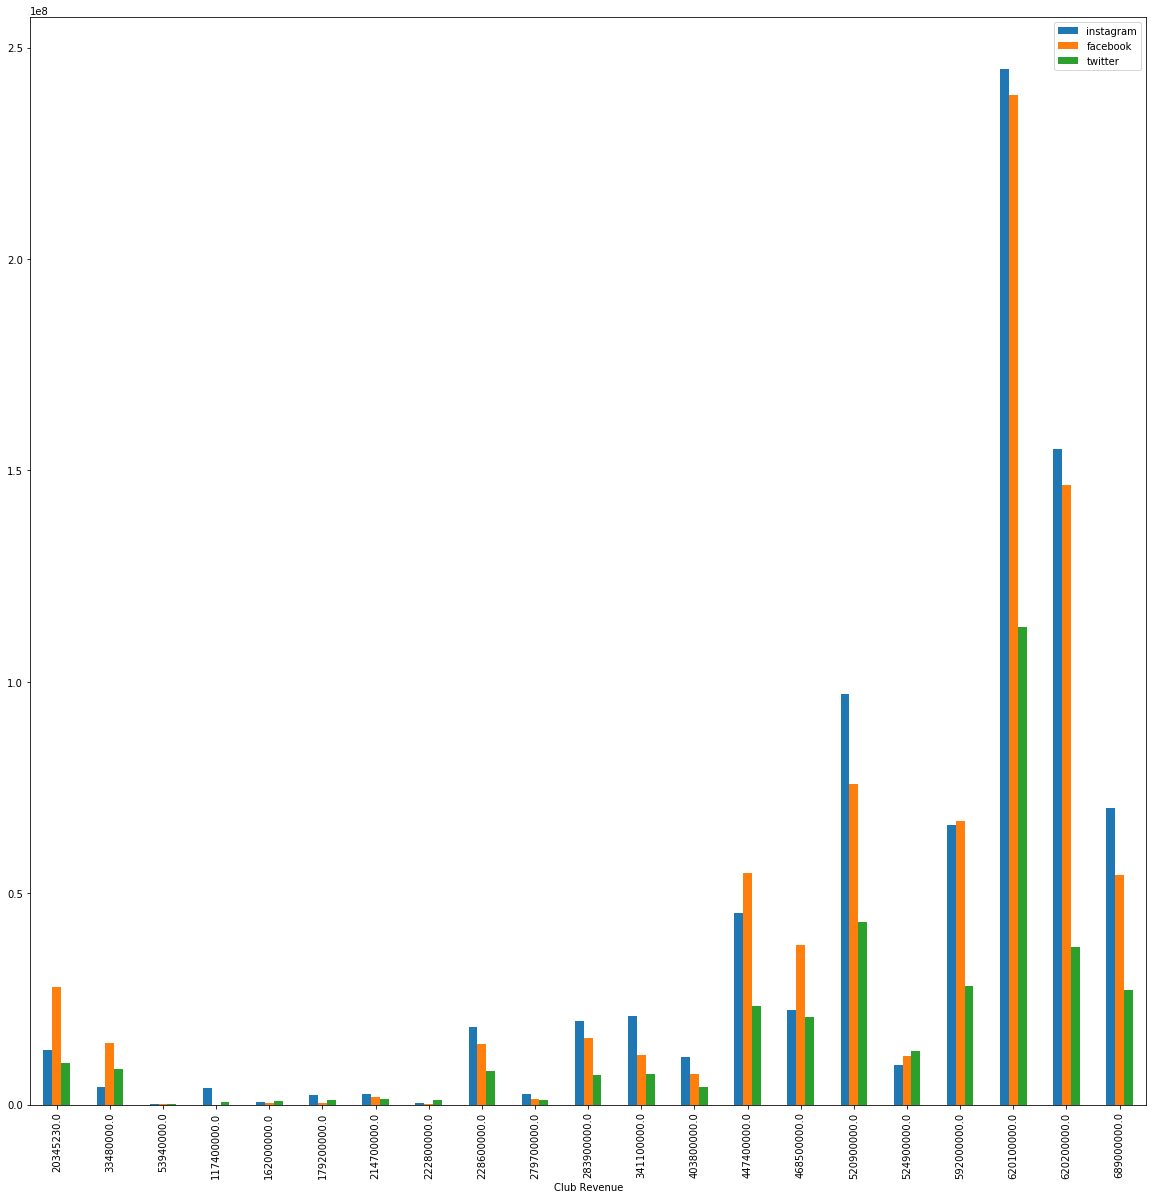

In [403]:
group_data = df_playerdata_addrev2.groupby(['Club Revenue'])['instagram','facebook', 'twitter'].sum()
group_data.plot.bar(figsize=(20, 20))

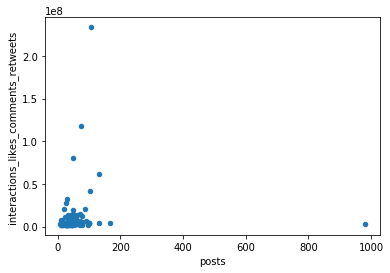

In [404]:
df_socmed.plot(kind='scatter', x='posts', y='interactions_likes_comments_retweets')

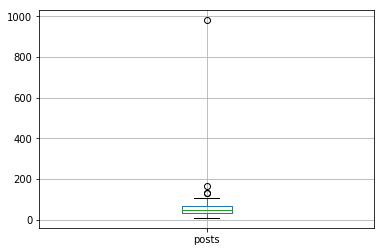

In [406]:
df_socmed.boxplot(column='posts')

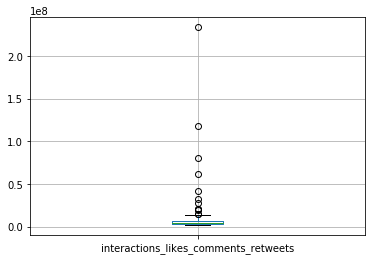

In [421]:
df_socmed.boxplot(column='interactions_likes_comments_retweets')

Text(0.5,0,'All Active Players')

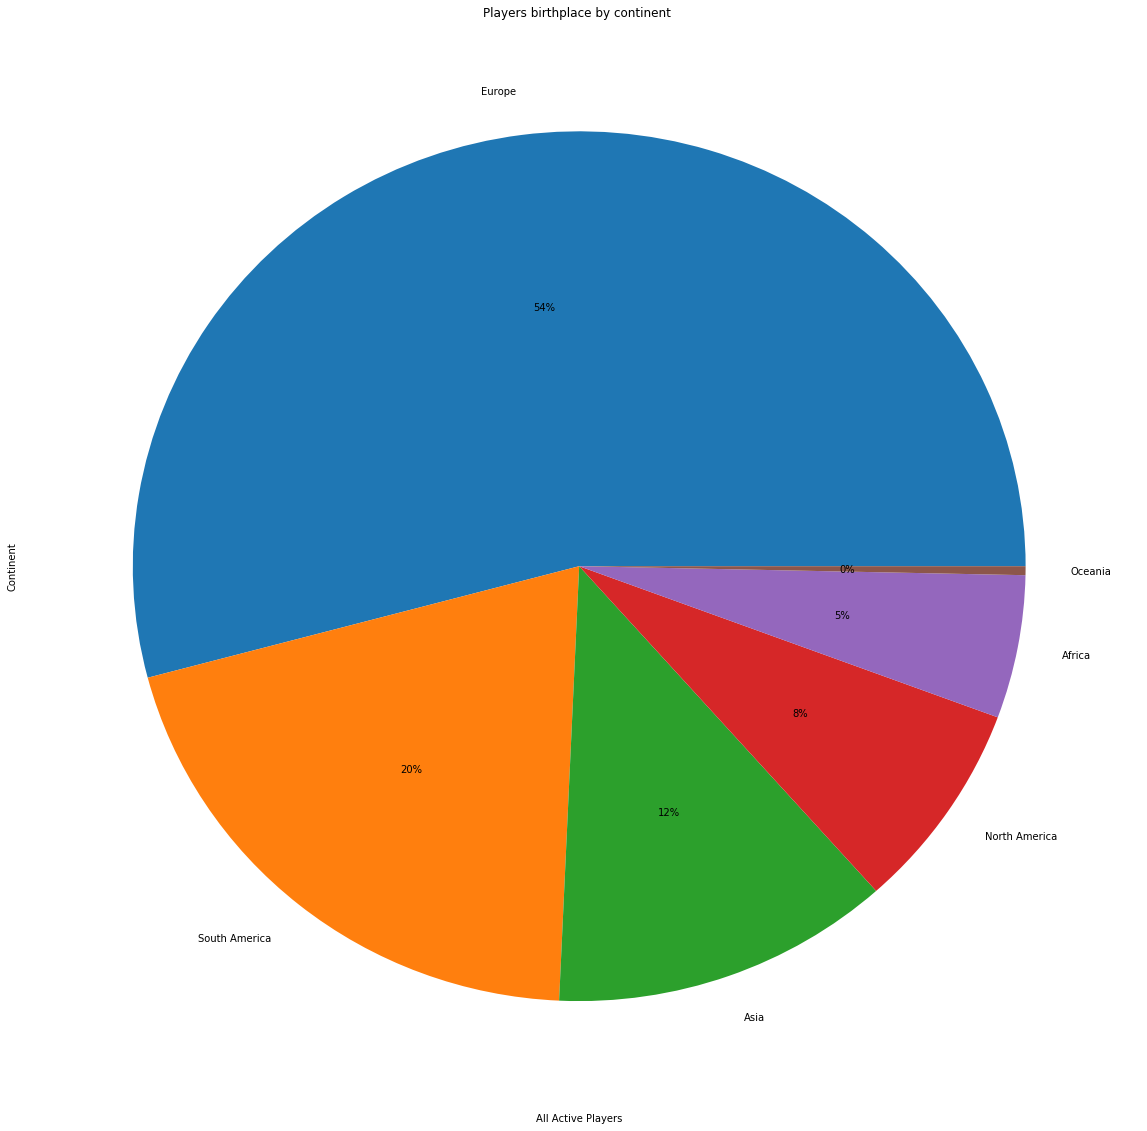

In [410]:
df_playerdata.Continent.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))
plt.title('Players birthplace by continent ')
plt.xlabel('All Active Players')

Text(0.5,0,'Players in top 100 Social Media')

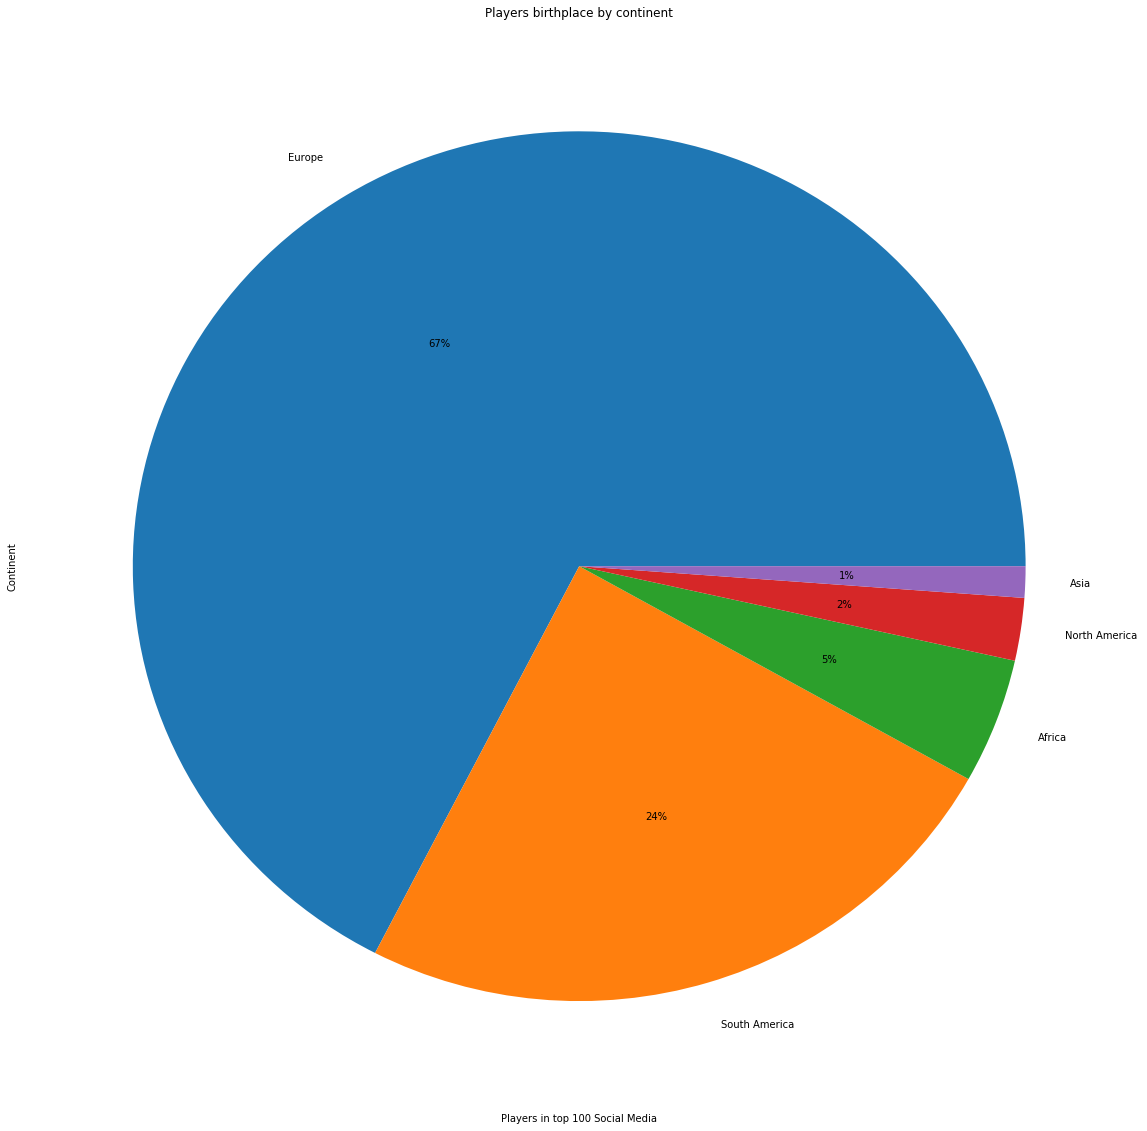

In [411]:
df_playerdata_merge.Continent.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))
plt.title('Players birthplace by continent')
plt.xlabel('Players in top 100 Social Media')

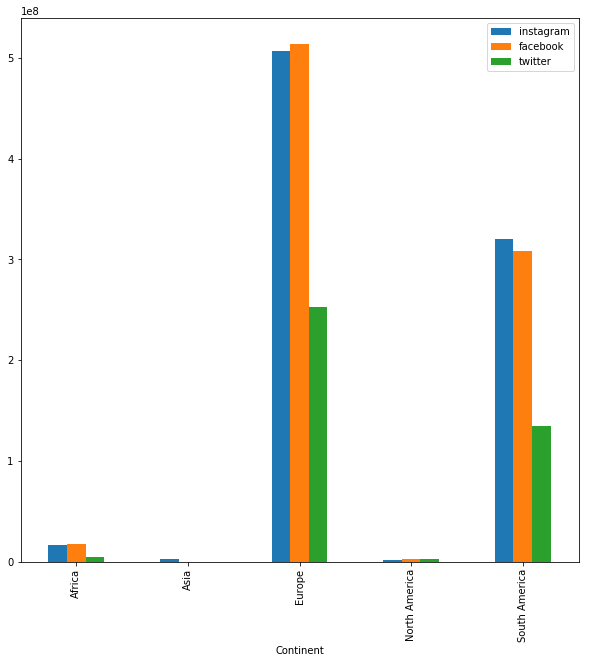

In [413]:
#followers by continent
group_data_cont = df_playerdata_merge.groupby(['Continent'])['instagram','facebook', 'twitter'].sum()
group_data_cont.plot.bar(figsize=(10, 10))

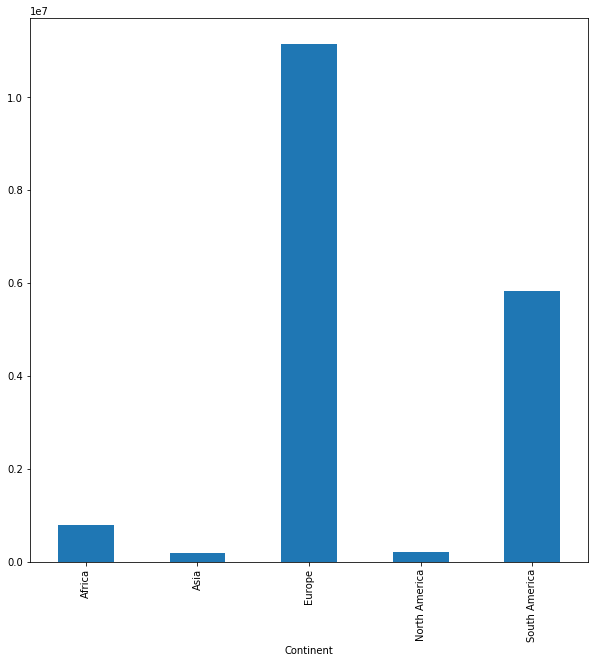

In [425]:
group_data_cont = df_playerdata_merge.groupby(['Continent'])['aipp'].sum()
group_data_cont.plot.bar(figsize=(10, 10))


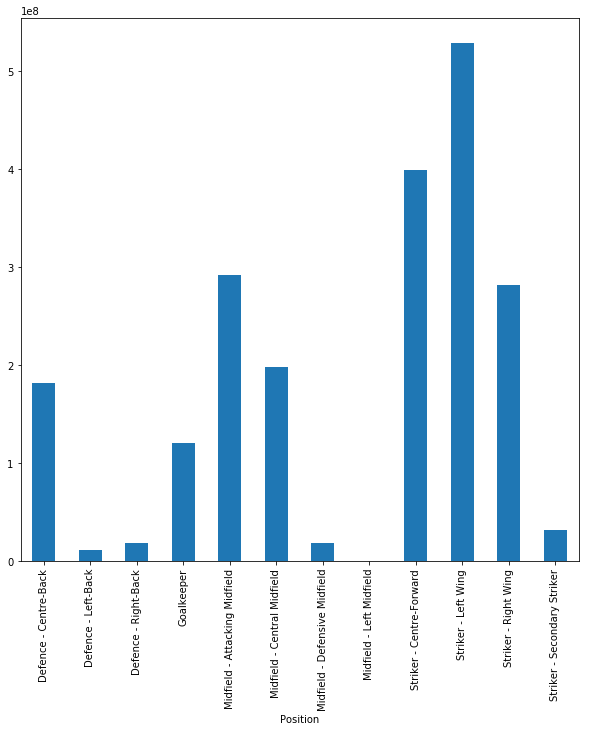

In [423]:
group_data_pos = df_playerdata_merge.groupby(['Position'])['total_followers'].sum()
group_data_pos.plot.bar(figsize=(10, 10))

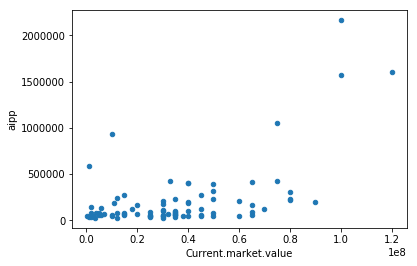

In [446]:
df_playerdata_addrev.plot(kind='scatter', x='Current.market.value', y='aipp')

In [452]:
cmv = df_playerdata_addrev2['Current.market.value']
aipp = df_playerdata_addrev2['aipp']
aipp = aipp.dropna()
sp.stats.ttest_ind(cmv, aipp, equal_var=False)

Ttest_indResult(statistic=12.715130138605467, pvalue=1.3197396538813868e-20)

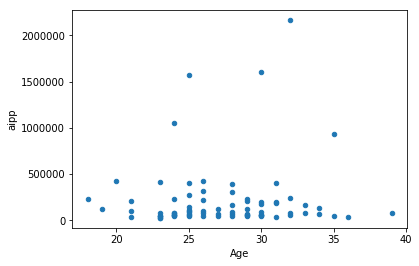

In [453]:
df_playerdata_addrev2.plot(kind='scatter', x='Age', y='aipp')

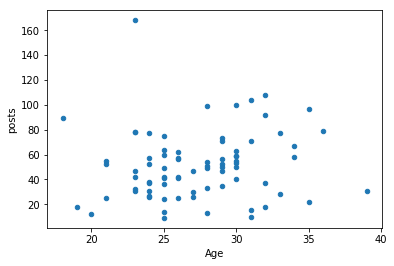

In [455]:
df_playerdata_addrev2.plot(kind='scatter', x='Age', y='posts')